Connect to Google Drive

In [ ]:
# Import the main libraries
import numpy as np
import cv2 # OpenCV for reading images
import os
import matplotlib.pyplot as plt

In [ ]:
# Import the necessary library and mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading Images

In [ ]:
# Path to the folder in your Google Drive
folder_path = "/content/drive/MyDrive/Informacion del ITESM/Colab Notebooks (ITESM)/Vision computacional/data"

image_filenames = [
    "Paisaje_swahe.jpg",
    "RayosX_swahe.jpg",
    "Arbol_swahe.jpg"
]

WINDOW_SIZE = 51 # Can adjust this value
CLIP_LIMIT = 0.02 # Adjust this value (e.g., 0.01 to 0.05 are common starting points)

 Define the SWAHE Function


In [ ]:
# 3. SWAHE DEFINITION (IMPROVED WITH CLIP LIMIT)
def swahe(image, window_size, clip_limit=0.02): # Default clip_limit added

    if window_size % 2 == 0:
        raise ValueError("Window size must be odd.")

    h, w = image.shape
    output_image = np.zeros_like(image)
    pad_size = window_size // 2
    padded_image = np.pad(image, pad_size, mode='reflect')

    print(f"Processing a {h}x{w} image with a {window_size}x{window_size} window and clip_limit={clip_limit}...")

    for y in range(h):
        for x in range(w):
            window = padded_image[y : y + window_size, x : x + window_size]
            center_pixel_value = image[y, x]

            # Calculate histogram
            hist, bins = np.histogram(window.flatten(), bins=256, range=[0, 256])

            # --- Apply Contrast Limiting (CLAHE-like behavior) ---
            # Calculate the actual clip limit based on the window size and normalized clip_limit
            # This is a simplification; a full CLAHE implementation is more complex
            num_pixels_in_window = window.size
            max_bin_height = num_pixels_in_window * clip_limit

            # Clip the histogram bins
            excess = 0
            for i in range(len(hist)):
                if hist[i] > max_bin_height:
                    excess += hist[i] - max_bin_height
                    hist[i] = max_bin_height

            # Redistribute the excess
            redistribute_per_bin = excess / 256
            for i in range(len(hist)):
                hist[i] += redistribute_per_bin
            # --- End Contrast Limiting ---

            # Calculate CDF
            cdf = hist.cumsum()

            if cdf[-1] == 0:
                output_image[y, x] = 0
                continue

            # Normalize CDF to 0-255
            cdf_normalized = (cdf * 255 / cdf[-1]).astype(np.uint8)

            # Map the center pixel's value
            output_image[y, x] = cdf_normalized[center_pixel_value]

    print("Processing complete!")
    return output_image

PROCESSING AND VISUALIZATION

--- Starting the processing of specific images from Drive ---

Loading and processing: Paisaje_swahe.jpg
Processing a 200x250 image with a 51x51 window and clip_limit=0.02...
Processing complete!


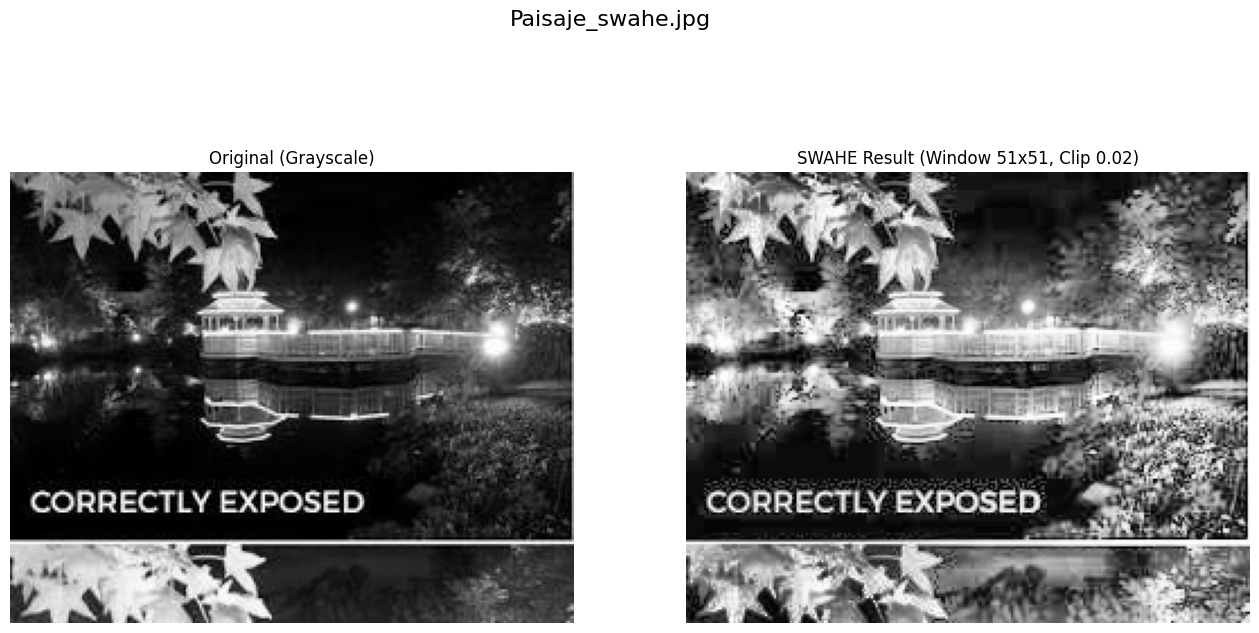


Loading and processing: RayosX_swahe.jpg
Processing a 3999x3722 image with a 51x51 window and clip_limit=0.02...


In [ ]:
# --- Processing loop ---
print("--- Starting the processing of specific images from Drive ---")
for image_name in image_filenames:
    full_path = os.path.join(folder_path, image_name)

    if not os.path.exists(full_path):
        print(f"\nWARNING: File '{image_name}' not found at the specified path. Skipping.")
        continue

    print(f"\nLoading and processing: {image_name}")

    original_image = cv2.imread(full_path)

    if original_image is None:
        print(f"  Error reading the image. Skipping.")
        continue

    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply SWAHE with the improved function and clip_limit
    swahe_result = swahe(gray_image, window_size=WINDOW_SIZE, clip_limit=CLIP_LIMIT)

    # Display the results
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    axes[0].imshow(gray_image, cmap='gray')
    axes[0].set_title('Original (Grayscale)')
    axes[0].axis('off')

    axes[1].imshow(swahe_result, cmap='gray')
    axes[1].set_title(f'SWAHE Result (Window {WINDOW_SIZE}x{WINDOW_SIZE}, Clip {CLIP_LIMIT})')
    axes[1].axis('off')

    fig.suptitle(image_name, fontsize=16)
    plt.show()

## Conclusion

This practice successfully demonstrated the application of Sliding Window Adaptive Histogram Equalization (SWAHE) for enhancing image contrast. By processing images with a sliding window, the SWAHE algorithm effectively adapts the histogram equalization to local image characteristics, resulting in improved detail visibility compared to global histogram equalization methods.

The visual comparison between the original grayscale images and their SWAHE-processed counterparts clearly illustrated the enhancement achieved, particularly in areas with varying light conditions or subtle details. The use of a configurable window size allowed for exploration of its impact on the resulting image enhancement.

It's worth noting that while effective, the SWAHE process, especially with larger images or window sizes, can be computationally intensive and result in longer processing times compared to simpler methods.

This exercise highlights the utility of adaptive histogram equalization techniques like SWAHE in computer vision tasks where local contrast enhancement is crucial for subsequent analysis or visualization.